## CRISP-DM Data Analysis process on Thread's reviews data
This will go over the CRISP-DM methodology on existing reviews of Threads in order to further understand the data

# Data Understanding

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
file_path = '/content/threads_reviews.csv'
df = pd.read_csv(file_path)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40435 entries, 0 to 40434
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              40435 non-null  object
 1   review_description  40435 non-null  object
 2   rating              40435 non-null  int64 
 3   review_date         40435 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00


In [6]:
# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Convert the 'review_date' column to a datetime object
df['review_date'] = pd.to_datetime(df['review_date'], format='%d-%m-%Y %H:%M')

In [8]:
# Summary statistics for numerical features
numerical_summary = df.describe()

In [9]:
# Frequency distribution for categorical features
source_frequency = df['source'].value_counts()
rating_frequency = df['rating'].value_counts()

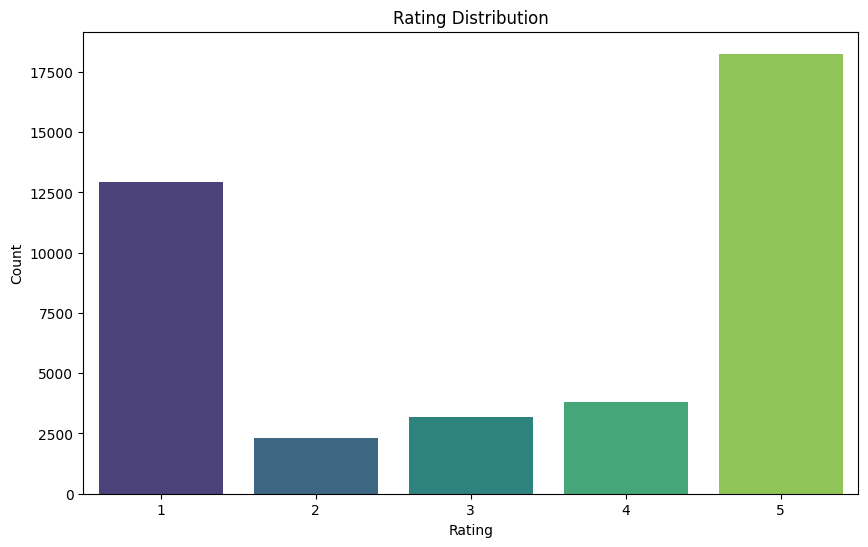

(             rating
 count  40435.000000
 mean       3.300532
 std        1.773157
 min        1.000000
 25%        1.000000
 50%        4.000000
 75%        5.000000
 max        5.000000,
 Google Play    36687
 App Store       3748
 Name: source, dtype: int64,
 5    18253
 1    12921
 4     3786
 3     3177
 2     2298
 Name: rating, dtype: int64)

In [10]:
# Initial data visualizations
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

numerical_summary, source_frequency, rating_frequency

# Data Preparation

In [11]:
# Importing packages for text processing and feature engineering
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime

In [12]:
# Manually specifying a small list of stopwords
stop_words = set(['the', 'and', 'to', 'of', 'it', 'in', 'is', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'but', 'on', 'not'])

In [20]:
# Text Preprocessing: Lowercasing, Tokenization, and Stemming
def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [21]:
# Feature Engineering: Extracting information from 'review_date'
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day'] = df['review_date'].dt.day
df['review_weekday'] = df['review_date'].dt.weekday

In [16]:
# Show processed data
df.head()

,source,review_description,rating,review_date,review_year,review_month,review_day,review_weekday
0,Google Play,Very good app for Android phone and me,5,2023-08-27 10:31:00,2023,8,27,6
1,Google Play,Sl👍👍👍👍,5,2023-08-27 10:28:00,2023,8,27,6
2,Google Play,Best app,5,2023-08-27 09:47:00,2023,8,27,6
3,Google Play,Gatiya app,1,2023-08-27 09:13:00,2023,8,27,6
4,Google Play,Lit bruv,5,2023-08-27 09:00:00,2023,8,27,6


In [23]:
# Checking for any inconsistencies and anomalies in the data
unusual_ratings = df[~df['rating'].between(1, 5)]
unusual_dates = df[df['review_date'] > datetime.now()]

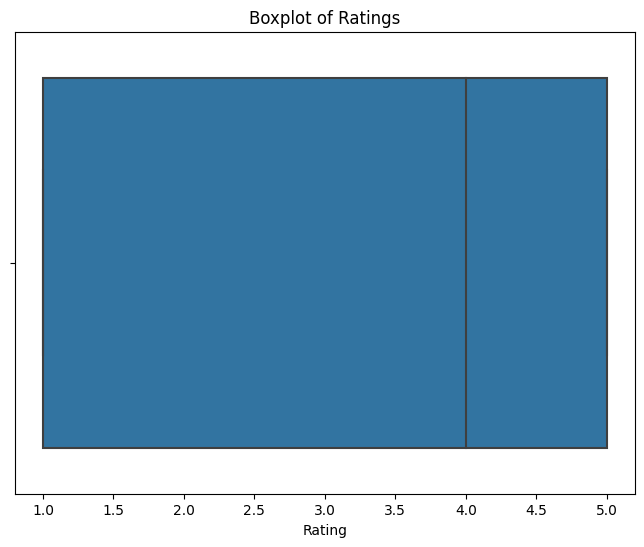

(Empty DataFrame
 Columns: [source, review_description, rating, review_date, review_year, review_month, review_day, review_weekday]
 Index: [],
 Empty DataFrame
 Columns: [source, review_description, rating, review_date, review_year, review_month, review_day, review_weekday]
 Index: [])

In [24]:
# Outlier analysis on 'rating'
# Boxplot to visualize potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=df)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

unusual_ratings, unusual_dates

In [25]:
# Importing packages for feature selection and clustering
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [26]:
# Feature Selection: Identify important features for model building
# For this exercise, we'll consider only the engineered features and 'rating' as the target variable
features_df = df[['review_year', 'review_month', 'review_day', 'review_weekday']]
target_df = df['rating']

In [27]:
# Use SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(features_df, target_df)
# Summarize scores
feature_scores = pd.DataFrame({'Feature': features_df.columns, 'Score': fit.scores_}).sort_values(by='Score', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [28]:
# Data Clustering: Group similar observations to understand patterns
# For simplicity, we'll use KMeans clustering on a subset of the data
features_subset = features_df.sample(frac=0.1, random_state=1)
kmeans = KMeans(n_clusters=5, random_state=1)
clusters = kmeans.fit_predict(features_subset)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Data Splitting: Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=1)

feature_scores, clusters[:10]

(          Feature       Score
 2      review_day  383.973596
 1    review_month   77.090072
 3  review_weekday    0.704094
 0     review_year         NaN,
 array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

# Modeling and Evaluation

In [30]:
# Importing packages for modeling and evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)

In [32]:
# Fit models on training data
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [33]:
# Make predictions on testing data
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [34]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [35]:
linear_metrics = evaluate_model(y_test, linear_pred)
ridge_metrics = evaluate_model(y_test, ridge_pred)
lasso_metrics = evaluate_model(y_test, lasso_pred)

In [36]:
# Create a DataFrame to summarize metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score'],
    'Linear Regression': linear_metrics,
    'Ridge Regression': ridge_metrics,
    'Lasso Regression': lasso_metrics
})

metrics_df

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,Mean Squared Error,3.018120,3.018120,3.031144
1,Mean Absolute Error,1.607782,1.607782,1.615764
2,R2 Score,0.037989,0.037989,0.033838
